In [1]:
!pip install yfinance pandas scikit-learn matplotlib

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ---------------------------------------- 10.2/949.2 kB ? eta -:--:--
     ---------------------------------------- 10.2/949.2 kB ? eta -:--:--
     ---------------------------------------- 10.2/949.2 kB ? eta -:--:--
     ---------------------------------------- 10.2/949.2 kB ? eta -:--:--
     - --


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import yfinance as yf
import os
import pandas as pd
import matplotlib.pyplot as plt # Added for plotting
from sklearn.ensemble import RandomForestClassifier

In [5]:
btc_ticker = yf.Ticker("BTC-USD")

# Fetch historical data for Bitcoin and save as btc.csv
btc = btc_ticker.history(period="max")
btc.to_csv("btc.csv")

In [6]:
btc.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0


In [8]:
btc.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-07-18 00:00:00+00:00,119284.109375,120851.914062,116925.984375,118003.226562,77945799785,0.0,0.0
2025-07-19 00:00:00+00:00,117998.125000,118541.398438,117388.414062,117939.976562,47564562765,0.0,0.0
2025-07-20 00:00:00+00:00,117944.109375,118865.031250,116550.132812,117300.789062,57515447231,0.0,0.0
2025-07-21 00:00:00+00:00,117306.468750,119671.562500,116584.398438,117439.539062,69820091744,0.0,0.0
2025-07-22 00:00:00+00:00,117419.648438,119444.929688,116639.500000,118931.593750,77453328384,0.0,0.0


In [9]:
# Drop rows with any NaN values
btc = btc.dropna()

# Convert the index to datetime objects if needed
# If the index is already datetime, this will have no effect
btc.index = pd.to_datetime(btc.index)

# Convert column names to lowercase for consistency
btc.columns = [c.lower() for c in btc.columns]

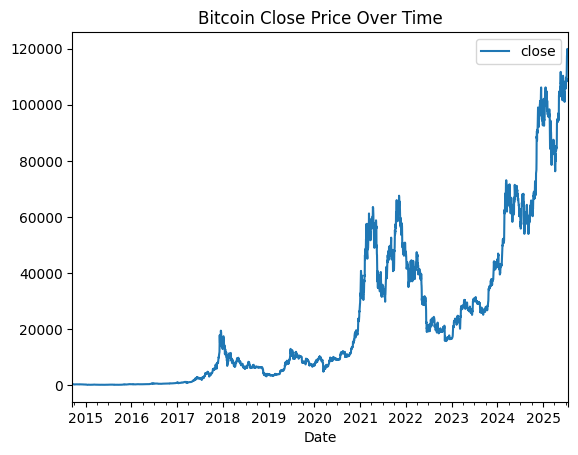

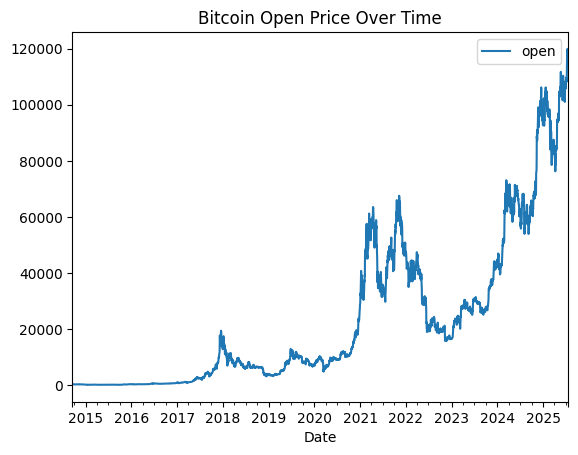

In [10]:
# Plotting the 'close' price
btc.plot.line(y="close", use_index=True, title="Bitcoin Close Price Over Time")
plt.show()

# Plotting the 'open' price
btc.plot.line(y="open", use_index=True, title="Bitcoin Open Price Over Time")
plt.show()

In [11]:
# Initialize the Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

# Split the data into training and testing sets
# The last 200 rows are reserved for testing
train = btc.iloc[:-200]
test = btc.iloc[-200:]

print("Train set shape:", train.shape)
print("Test set shape:", test.shape)

# Example of how you would define predictors and fit the model (commented out as in original)
# predictors = ["close", "open", "high", "low", "volume_(btc)", "volume_(currency)", "weighted_price"] 
# model.fit(train[predictors], train["close"]) # Assuming you want to predict 'close' or 'low'

Train set shape: (3762, 7)
Test set shape: (200, 7)
